In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (7).csv


# EDA

In [ ]:
import pandas as pd
import numpy as np

# I will now read in the csv
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
df = pd.read_csv("AB_NYC_2019 (7).csv")

# This function will check to make sure that it was read in correctly
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.rename(columns={'neighbourhood_group': 'Borough', 'neighbourhood': 'Neighbourhood', 'room_type': 'Room_type', 'minimum_nights': 'Minimum_nights', 'availability_365': 'Availability_365', 'price': 'Price'}, inplace=True)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'Borough', 'Neighbourhood',
       'latitude', 'longitude', 'Room_type', 'Price', 'Minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'Availability_365'],
      dtype='object')

In [ ]:
df.drop(['id','name','host_id','host_name', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'longitude', 'latitude'], axis=1, inplace=True)
df.head()

,Borough,Neighbourhood,Room_type,Price,Minimum_nights,Availability_365
0,Brooklyn,Kensington,Private room,149,1,365
1,Manhattan,Midtown,Entire home/apt,225,1,355
2,Manhattan,Harlem,Private room,150,3,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,0


In [ ]:
# Columns 'to_list()'
df.columns.to_list()

['Borough',
 'Neighbourhood',
 'Room_type',
 'Price',
 'Minimum_nights',
 'Availability_365']

In [ ]:
# This will rearrange the columns
df = df[["Borough",
         "Neighbourhood",
         "Room_type",
         "Availability_365",
         "Minimum_nights",
         "Price"]]

# This will check to make sure that they were done correctly
print(df.shape)
df.head()

(48895, 6)


,Borough,Neighbourhood,Room_type,Availability_365,Minimum_nights,Price
0,Brooklyn,Kensington,Private room,365,1,149
1,Manhattan,Midtown,Entire home/apt,355,1,225
2,Manhattan,Harlem,Private room,365,3,150
3,Brooklyn,Clinton Hill,Entire home/apt,194,1,89
4,Manhattan,East Harlem,Entire home/apt,0,10,80


In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Defining Function -- ** nunique() **
def data_distributions(df):

  # predifined columns
  cols = ["Borough",
          "Neighbourhood",
          "Room_type",
          "Availability_365",
          "Minimum_nights"]

  # For loop for specified columns
  for col in cols:
    print(col + ":", df[col].nunique())
    print("\n")
    print(df[col].value_counts(normalize=True))
    print("-----\n")


# Now we need to call the function on the df
data_distributions(df)

Borough: 5


Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: Borough, dtype: float64
-----

Neighbourhood: 221


Williamsburg          0.080172
Bedford-Stuyvesant    0.075959
Harlem                0.054361
Bushwick              0.050414
Upper West Side       0.040311
                        ...   
Rossville             0.000020
Fort Wadsworth        0.000020
New Dorp              0.000020
Richmondtown          0.000020
Willowbrook           0.000020
Name: Neighbourhood, Length: 221, dtype: float64
-----

Room_type: 3


Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: Room_type, dtype: float64
-----

Availability_365: 366


0      0.358585
365    0.026485
364    0.010042
1      0.008344
89     0.007383
         ...   
195    0.000532
196    0.000491
183    0.000491
181    0.000470
202    0.000409
Name: Availability_365, Length: 366, dtype: float64
-----

Minim

In [ ]:
# Defining Function -- ** value_counts() **
def values_function(df):
  # Predefined column 
   cols = ["Borough",
          "Neighbourhood",
          "Room_type",
          "Availability_365",
          "Minimum_nights"]

   for c in cols:
     print("---- %s ---" % c)
     print(df[c].value_counts())
     print("\n")

# Calling the Function
values_function(df)

---- Borough ---
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: Borough, dtype: int64


---- Neighbourhood ---
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Willowbrook              1
Name: Neighbourhood, Length: 221, dtype: int64


---- Room_type ---
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: Room_type, dtype: int64


---- Availability_365 ---
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: Availability_365, Length: 366, dtype: int64


---- Minimum_nights ---
1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1


In [ ]:
# Now I need to check for any NaN's
df.isnull().sum()

Borough             0
Neighbourhood       0
Room_type           0
Availability_365    0
Minimum_nights      0
Price               0
dtype: int64

In [ ]:
# Next will be to describe the metrics
df.describe()

,Availability_365,Minimum_nights,Price
count,48895.000000,48895.000000,48895.000000
mean,112.781327,7.029962,152.720687
std,131.622289,20.510550,240.154170
min,0.000000,1.000000,0.000000
25%,0.000000,1.000000,69.000000
50%,45.000000,3.000000,106.000000
75%,227.000000,5.000000,175.000000
max,365.000000,1250.000000,10000.000000


In [ ]:
import pandas.util.testing as tm
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors 
%matplotlib inline

In [ ]:
# Not Removing Anything
dfx = df

# CHECK:
print(df.shape)
df.head()

(48895, 6)


,Borough,Neighbourhood,Room_type,Availability_365,Minimum_nights,Price
0,Brooklyn,Kensington,Private room,365,1,149
1,Manhattan,Midtown,Entire home/apt,355,1,225
2,Manhattan,Harlem,Private room,365,3,150
3,Brooklyn,Clinton Hill,Entire home/apt,194,1,89
4,Manhattan,East Harlem,Entire home/apt,0,10,80


In [ ]:
# Name Column -- CHECK
dfx["Price"][:10]

0    149
1    225
2    150
3     89
4     80
5    200
6     60
7     79
8     79
9    150
Name: Price, dtype: int64

## Modeling

#### PreProcessing

In [ ]:
# I need to install category encoders
!pip install category_encoders

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import category_encoders as ce 

import warnings
warnings.filterwarnings("ignore")

# This will use a defining function
def preprocessing(df):
  """
  Precprocesses the data.

  Input: DataFrame

  Output: X_train, X_test, y_train, y_test
  """

  # Copy the DF
  dfx = df.copy()

  # Targets and Features
  target = "Price"
  features = ["Borough",
              "Neighbourhood",
              "Room_type",
              "Minimum_nights",
              "Availability_365"]

  # This will create the X Features Matrix
  X = dfx[features]

  # This will create the y target vector
  y = dfx[target]

  # This function will map - 'room_type'
  room_type_dict = {"Shared room":1, "Private room":2, "Entire home/apt":3}
  X.iloc[:, 4].map(room_type_dict)
  # print(X["room_type"])

  # Now we will create the Train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

  # Preprocess Pipline -- OrdinalEncoder and StandardScaler
  preprocess = make_pipeline(
      ce.OrdinalEncoder(),
      StandardScaler()
  )

  # Now we will Fit Transform and Transform Training and Testing Data
  X_train = preprocess.fit_transform(X_train)
  X_test = preprocess.fit_transform(X_test)

  # I now need to create a DataFrame for X Matrices
  X_train_df = pd.DataFrame(X_train, columns=features)
  X_test_df = pd.DataFrame(X_test, columns=features)
  print(X_train_df.shape,
        X_test_df.shape,
        X_train.shape,
        X_test.shape,
        y_train.shape,
        y_test.shape)

  # Return
  return X_train_df, X_test_df, X_train, X_test, y_train, y_test

# Calling function
X_train_df, X_test_df, X_train, X_test, y_train, y_test = preprocessing(dfx)

# Check it out
X_train_df.head()

(39116, 5) (9779, 5) (39116, 5) (9779, 5) (39116,) (9779,)


,Borough,Neighbourhood,Room_type,Minimum_nights,Availability_365
0,-0.970576,-0.883734,-0.922048,-0.193025,-0.852862
1,0.290219,-0.855241,0.912947,-0.239596,-0.860447
2,-0.970576,-0.826749,0.912947,-0.239596,-0.860447
3,-0.970576,-0.826749,-0.922048,-0.193025,1.164663
4,1.551014,-0.798257,0.912947,-0.099884,-0.860447


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Instantiate Model
lin_reg = LinearRegression()

# Fitting the Model to the training data
lin_reg.fit(X_train_df, y_train)

# Predicting the Training Price based on Training Data
y_pred_train = lin_reg.predict(X_train_df)
y_pred_test = lin_reg.predict(X_test_df)

# Reporting Metrics Function
def reporting_metrics(y_vector, y_pred_vector):
  mse = mean_squared_error(y_vector, y_pred_vector)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_vector, y_pred_vector)
  r2 = r2_score(y_vector, y_pred_vector)
  print("DATA METRICS \n")

  print("Mean Absolute Error:", mae)
  print("Mean Squared Error:", mse)
  print("Root Mean Squared Error:", rmse)
  print("R^2:", r2)

  print(".....")


# Calling Function -- ** TRAINING DATA **
reporting_metrics(y_train, y_pred_train)

# Intercept
print("Intercept:", lin_reg.intercept_)
print("\n")

# Coefficients
coefs = pd.Series(lin_reg.coef_, X_train_df.columns)
print("Coefficients:")
print(coefs)

DATA METRICS 

Mean Absolute Error: 78.50911758997778
Mean Squared Error: 56987.52810700086
Root Mean Squared Error: 238.72060679170716
R^2: 0.06617906492263281
.....
Intercept: 153.75158502914408


Coefficients:
Borough              1.456468
Neighbourhood       -0.056954
Room_type          -60.019330
Minimum_nights       3.696906
Availability_365    20.545710
dtype: float64


In [ ]:
# Calling Function -- ** TESTING DATA **
reporting_metrics(y_test, y_pred_test)

# Intercept
print("Intercept:", lin_reg.intercept_)
print("\n")

# Coefficients
coefs = pd.Series(lin_reg.coef_, X_test_df.columns)
print("Coefficients:")
print(coefs)

DATA METRICS 

Mean Absolute Error: 75.00544773709035
Mean Squared Error: 40247.45484923003
Root Mean Squared Error: 200.61768329145372
R^2: 0.09021116691410547
.....
Intercept: 153.75158502914408


Coefficients:
Borough              1.456468
Neighbourhood       -0.056954
Room_type          -60.019330
Minimum_nights       3.696906
Availability_365    20.545710
dtype: float64


## Random Forest Regressor

DATA METRICS 

Mean Absolute Error: 42.677445121410614
Mean Squared Error: 20839.47702793441
Root Mean Squared Error: 144.35884811099876
R^2: 0.6585158091396783
.....


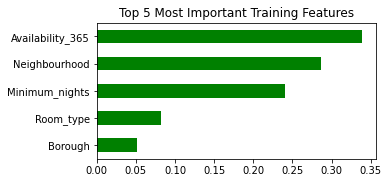

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Instantiate Model
rf_reg = RandomForestRegressor()

# Fitting the Model to the training data
rf_reg.fit(X_train_df, y_train)

# Predicting
y_pred_train = rf_reg.predict(X_train_df)
y_pred_test = rf_reg.predict(X_test_df)

# Reporting Metrics -- TRAINING DATA
reporting_metrics(y_train, y_pred_train)

# Get Feature Importances
importances = pd.Series(rf_reg.feature_importances_, X_train_df.columns)

# Plot Top N Features Importances
n = 5
plt.figure(figsize = (5, n/2))
plt.title(f"Top {n} Most Important Training Features")
importances.sort_values()[-n:].plot.barh(color = "green");

In [ ]:
from sklearn.externals import joblib
from joblib import dump, load

dump(rf_reg, 'rf_reg.joblib')

['rf_reg.joblib']

In [ ]:
joblib.load

<function joblib.numpy_pickle.load>

DATA METRICS 

Mean Absolute Error: 91.9342476811693
Mean Squared Error: 68627.98222340636
Root Mean Squared Error: 261.9694299406066
R^2: -0.5513272105768163
.....


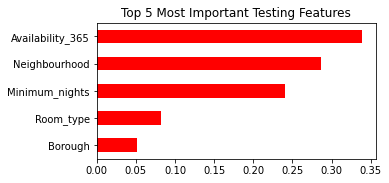

In [ ]:
# Reporting Metrics -- TESTING DATA
reporting_metrics(y_test, y_pred_test)

# Get Feature Importances
importances = pd.Series(rf_reg.feature_importances_, X_test_df.columns)

# Plot Top N Features Importances
n = 5
plt.figure(figsize = (5, n/2))
plt.title(f"Top {n} Most Important Testing Features")
importances.sort_values()[-n:].plot.barh(color = "red");

## We got the best scores and minimized errors most efficiently with the Random Forest Regressor, so we decided that it would be the best model to use for the prediction app.